In [47]:
# importar pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Prophet

- https://facebook.github.io/prophet/docs/quick_start.html
- https://github.com/facebook/prophet
- https://towardsdatascience.com/analysis-of-stock-market-cycles-with-fbprophet-package-in-python-7c36db32ecd0

In [4]:
from fbprophet import Prophet

In [5]:
# carregar arquivo de dados de treino
data = pd.read_csv('weather-train.csv', index_col='date', parse_dates=['date'])

data.head()

,temperature,humidity,wind_speed
date,,,
2012-10-01,11.036840,74.800000,0.000000
2012-10-02,14.340558,58.444444,0.666667
2012-10-03,14.518382,78.555556,1.888889
2012-10-04,16.820351,86.000000,1.333333
2012-10-05,16.948431,70.555556,3.666667


In [6]:
data2 = data[['temperature']]

data2 = data2.reset_index()
data2.columns = ['ds', 'y']

data2.head()

,ds,y
0,2012-10-01,11.036840
1,2012-10-02,14.340558
2,2012-10-03,14.518382
3,2012-10-04,16.820351
4,2012-10-05,16.948431


In [15]:
data2.tail()

,ds,y
1503,2016-11-12,8.532580
1504,2016-11-13,11.768994
1505,2016-11-14,11.840963
1506,2016-11-15,13.187376
1507,2016-11-16,16.712678


In [7]:
model = Prophet(daily_seasonality=False)
model.fit(data2)

In [8]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1868,2017-11-12
1869,2017-11-13
1870,2017-11-14
1871,2017-11-15
1872,2017-11-16


In [9]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1868,2017-11-12,19.077370,12.973963,25.324052
1869,2017-11-13,19.078866,13.176810,24.762202
1870,2017-11-14,18.843828,13.074938,24.173473
1871,2017-11-15,18.227422,12.136616,24.327504
1872,2017-11-16,17.907606,11.967058,23.781041


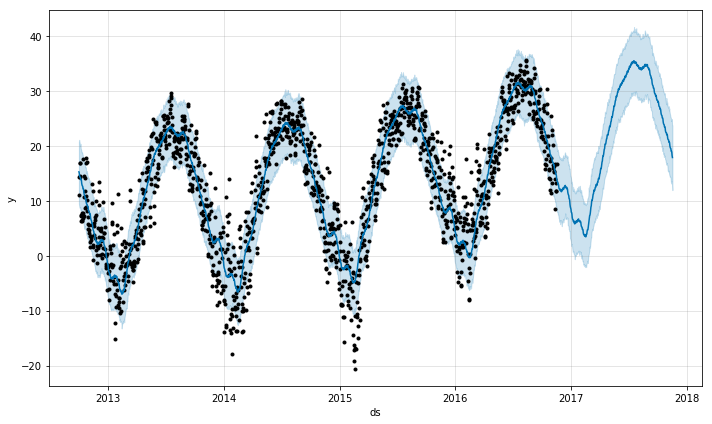

In [46]:
fig1 = model.plot(forecast)

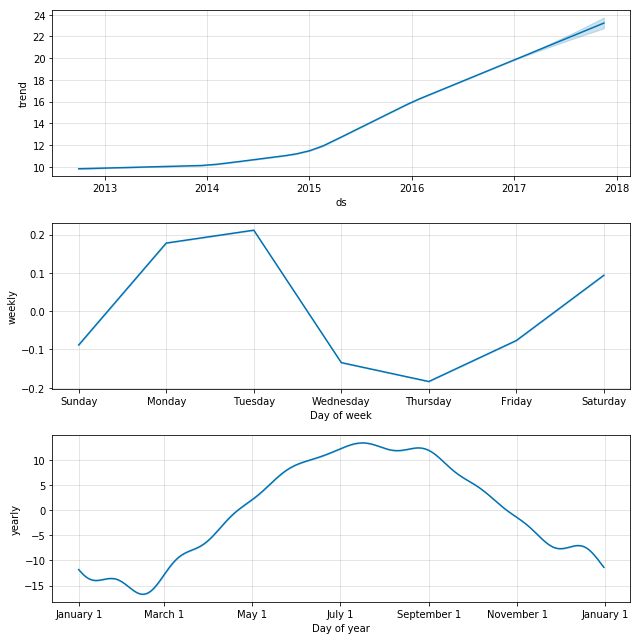

In [47]:
fig2 = model.plot_components(forecast)

- https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

In [10]:
test_dates = pd.date_range(start='2016-11-17', end='2017-11-29', freq='D')
test_dates

DatetimeIndex(['2016-11-17', '2016-11-18', '2016-11-19', '2016-11-20',
               '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24',
               '2016-11-25', '2016-11-26',
               ...
               '2017-11-20', '2017-11-21', '2017-11-22', '2017-11-23',
               '2017-11-24', '2017-11-25', '2017-11-26', '2017-11-27',
               '2017-11-28', '2017-11-29'],
              dtype='datetime64[ns]', length=378, freq='D')

In [13]:
test_data = pd.DataFrame(test_dates, columns=['ds'])
test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 1 columns):
ds    378 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


,ds
0,2016-11-17
1,2016-11-18
2,2016-11-19
3,2016-11-20
4,2016-11-21


In [14]:
forecast = model.predict(test_data)
forecast[['ds', 'yhat']].tail()

,ds,yhat
373,2017-11-25,16.198291
374,2017-11-26,15.890747
375,2017-11-27,16.056617
376,2017-11-28,16.015803
377,2017-11-29,15.621383


In [16]:
data2.shape

(1508, 2)

In [17]:
divisao = int(data2.shape[0] * 4 / 5)

data2a = data2[:divisao]
data2b = data2[divisao:]

In [20]:
data2a.info()
data2a.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 2 columns):
ds    1206 non-null datetime64[ns]
y     1205 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.9 KB


,ds,y
0,2012-10-01,11.036840
1,2012-10-02,14.340558
2,2012-10-03,14.518382
3,2012-10-04,16.820351
4,2012-10-05,16.948431


In [22]:
model = Prophet(daily_seasonality=False)
model.fit(data2a)

In [29]:
future = data2b.drop(['y'], axis=1)
future.info()
future.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 1206 to 1507
Data columns (total 1 columns):
ds    302 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


,ds
1206,2016-01-20
1207,2016-01-21
1208,2016-01-22
1209,2016-01-23
1210,2016-01-24


In [26]:
future = model.make_future_dataframe(periods=365)
future.info()
future.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 1 columns):
ds    1571 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.3 KB


,ds
0,2012-10-01
1,2012-10-02
2,2012-10-03
3,2012-10-04
4,2012-10-05


In [30]:
forecast = model.predict(future)

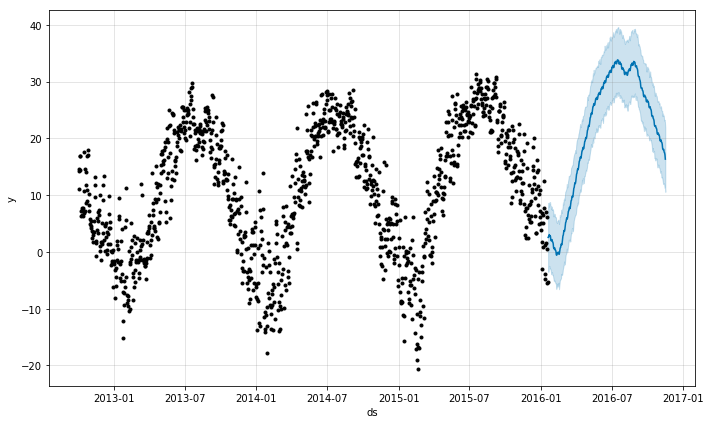

In [31]:
fig1 = model.plot(forecast)

In [32]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-20,16.833916,-3.503781,8.599627,16.833916,16.833916,-14.273049,-14.273049,-14.273049,-0.328717,-0.328717,-0.328717,-13.944333,-13.944333,-13.944333,0.0,0.0,0.0,2.560867
1,2016-01-21,16.850603,-3.509693,7.902561,16.850603,16.850603,-14.297465,-14.297465,-14.297465,-0.323908,-0.323908,-0.323908,-13.973557,-13.973557,-13.973557,0.0,0.0,0.0,2.553138
2,2016-01-22,16.867290,-2.503460,8.721796,16.867290,16.867290,-14.062992,-14.062992,-14.062992,-0.045530,-0.045530,-0.045530,-14.017462,-14.017462,-14.017462,0.0,0.0,0.0,2.804298
3,2016-01-23,16.883977,-2.442834,8.655866,16.883977,16.883977,-13.833420,-13.833420,-13.833420,0.245195,0.245195,0.245195,-14.078616,-14.078616,-14.078616,0.0,0.0,0.0,3.050557
4,2016-01-24,16.900664,-2.912240,8.386688,16.900664,16.900664,-14.096575,-14.096575,-14.096575,0.062423,0.062423,0.062423,-14.158998,-14.158998,-14.158998,0.0,0.0,0.0,2.804089


In [43]:
data3 = data2b.merge(forecast)[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']]
data3['diff'] = abs(data3['y'] - data3['yhat'])
data3.info()
data3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 301
Data columns (total 6 columns):
ds            302 non-null datetime64[ns]
y             302 non-null float64
yhat          302 non-null float64
yhat_lower    302 non-null float64
yhat_upper    302 non-null float64
diff          302 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 16.5 KB


,ds,y,yhat,yhat_lower,yhat_upper,diff
0,2016-01-20,-2.969248,2.560867,-3.503781,8.599627,5.530114
1,2016-01-21,-0.811279,2.553138,-3.509693,7.902561,3.364417
2,2016-01-22,1.663535,2.804298,-2.503460,8.721796,1.140763
3,2016-01-23,1.911159,3.050557,-2.442834,8.655866,1.139398
4,2016-01-24,1.528472,2.804089,-2.912240,8.386688,1.275616


In [44]:
data3.describe()

,y,yhat,yhat_lower,yhat_upper,diff
count,302.000000,302.000000,302.000000,302.000000,302.000000
mean,19.796033,21.321146,15.583419,27.025157,3.973556
std,10.014541,10.979939,10.973321,10.965209,3.004456
min,-8.033194,-0.585093,-6.574477,4.947979,0.030189
25%,11.977767,14.388130,8.231798,19.964063,1.515959
50%,21.142966,24.934836,19.207435,30.652589,3.376671
75%,28.415473,31.122330,25.360291,36.724260,5.804102
max,35.738109,33.807050,28.143988,39.617815,16.906823


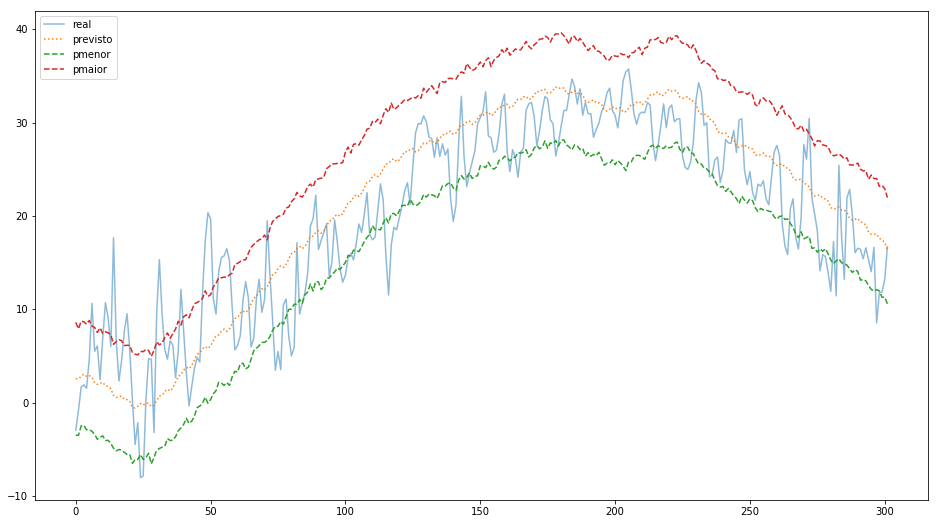

In [48]:
plt.figure(figsize=(16, 9))

data3['y'].plot(alpha=0.5, style='-')
data3['yhat'].plot(style=':')
data3['yhat_lower'].plot(style='--')
data3['yhat_upper'].plot(style='--')

plt.legend(['real', 'previsto', 'pmenor', 'pmaior'], loc='upper left')